/Users/carlosyuste/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlosyuste/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlosyuste/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlosyuste/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g.

Best order: (2, 0, 3)
                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                29580
Model:                 ARIMA(2, 0, 3)   Log Likelihood             -409224.603
Date:                Tue, 28 Nov 2023   AIC                         818463.205
Time:                        21:12:03   BIC                         818521.269
Sample:                             0   HQIC                        818481.848
                              - 29580                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.097e+05   1.02e-08      6e+13      0.000     6.1e+05     6.1e+05
ar.L1          1.3353      0.047     28.468      0.000       1.243       1.427
ar.L2         -0.3354      0.0

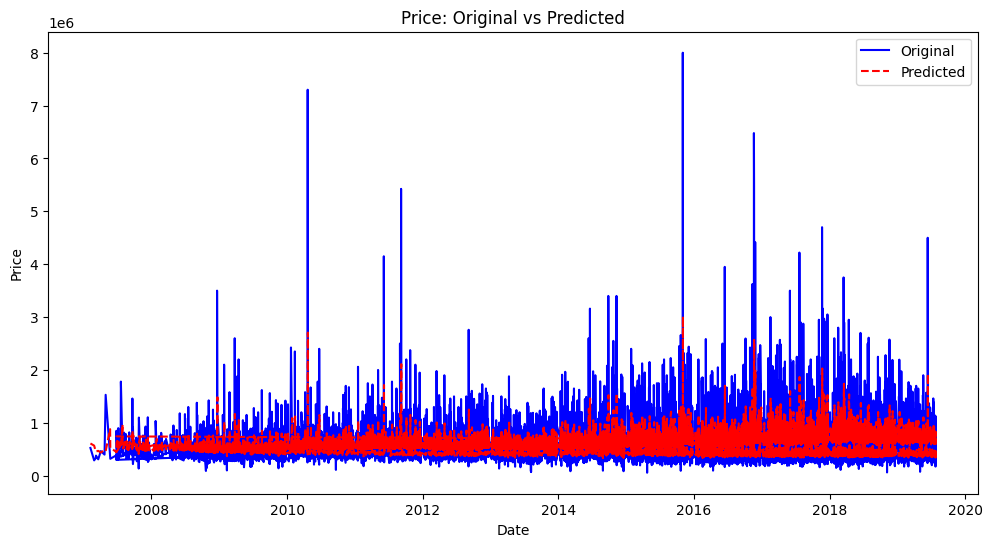

In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# 1.Data Preparation
url = 'https://raw.githubusercontent.com/cyustes/DeepLearning/main/raw_sales.csv'
response = requests.get(url)
csv_data = StringIO(response.text)
data = pd.read_csv(csv_data, delimiter=';', encoding='utf-8')

data = data.drop(data.columns[[1, 3, 4, 5]], axis=1)

# Data preprocessing
data['datesold'] = pd.to_datetime(data['datesold'])
data.set_index('datesold', inplace=True)


# 2.ARIMA model
p = range(0, 4)  
q = range(0, 4)  
pq = itertools.product(p, q)
best_aic = float("inf")
best_order = None
best_model = None

for combination in pq:
    try:
        model = ARIMA(data['price'], order=(combination[0], 0, combination[1]))
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = (combination[0], 0, combination[1])
            best_model = model_fit
    except:
        continue

print('Best order: {}'.format(best_order))
print(best_model.summary())

predictions = best_model.predict(start=0, end=len(data) - 1)

mse = mean_squared_error(data['price'], predictions)
mae = mean_absolute_error(data['price'], predictions)

print('Mean Squared Error (MSE): {}'.format(mse))
print('Mean Absolute Error (MAE): {}'.format(mae))

# Plots
plt.figure(figsize=(12, 6))
plt.plot(data['price'], label='Original', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.title('Price: Original vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()